In [111]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import hamming
import gudhi as gd
import seaborn as sns

<h3>Se cargan los datos</h3>

In [112]:
#Se cargan las coincidencias obtenidas por el BBH
pseudo_csv=pd.read_csv('/files/francisco_esp/Pseudomonas/Pseudomonas44.Central_MiBIG_DB.faa_Pseudo219/blast/BBH/Pseudo219/aux_files/vueltaPseudo219.blast.bbh', sep='\t', header=None)
pseudo_info=pseudo_csv[1]
#Se cargan los nombres comunes de las especies
pseudo_nombres=pd.read_csv('/files/francisco_esp/Pseudomonas/Pseudomonas.ids', sep='\t', header=None, dtype=str)
pseudo_nombres.set_index(1,inplace=True)

In [142]:
pseudo_info[1]=pseudo_info[1].replace('6666666.134953','h')

<h3>Con las siguientes funciones se depuran los datos y se elabora el data frame de presencia </h3>

In [ ]:
def get_presence(info,nombres):
    genomes=set()
    functions=set()
    for name in info:
        split=name.split('|')
        genomes.add(split[-1])
        functions.add(split[4])
    presence=pd.DataFrame(index=list(genomes),columns=list(functions))
    presence=full_presence(info,presence)
    return presence.fillna(0)

In [114]:
def full_presence(info,presence):
    for name in info:
        split=name.split('|')
        presence.loc[split[-1],split[4]]=1
    return presence

In [ ]:
def replce_for_true_names(info,nombres):
    for i in info.index:
        info[i]=
        

In [115]:
pseudo_presence=get_presence(pseudo_info)
pseudo_presence.sort_index(inplace=True)

In [118]:
pseudo_presence

,Threonine_dehydratase_biosynthetic_EC_4.3.1.19,Glutamine_synthetase_type_I_EC_6.3.1.2,Pyrroline5carboxylate_reductase_EC_1.5.1.2,Indole3glycerol_phosphate_synthase_EC_4.1.1.48,Valinepyruvate_aminotransferase_EC_2.6.1.66,3dehydroquinate_synthase_EC_4.2.3.4,Acetylglutamate_kinase_EC_2.7.2.8,Fumarate_hydratase_class_II_EC_4.2.1.2,3isopropylmalate_dehydrogenase_EC_1.1.1.85,Citrate_synthase_si_EC_2.3.3.1,...,Nacetylornithine_carbamoyltransferase_EC_2.1.3.9,Cysteine_synthase_EC_2.5.1.47,Transcriptional_regulator_GntR_family_domain__Aspartate_aminotransferase_EC_2.6.1.1,3isopropylmalate_dehydratase_large_subunit_EC_4.2.1.33,4hydroxytetrahydrodipicolinate_synthase_EC_4.3.3.7,Succinate_dehydrogenase_ironsulfur_protein_EC_1.3.99.1,Glutamate_synthase_NADPH_small_chain_EC_1.4.1.13,Glutamine_synthetase_EC_6.3.1.2,Argininosuccinate_lyase_EC_4.3.2.1,Cystathionine_betasynthase_EC_4.2.1.22
PseudomonasabietaniphilaBBQJ01,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0
PseudomonasabietaniphilaBBQR01,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0
Pseudomonasaeruginosa19brAFXJ01,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0
Pseudomonasaeruginosa3573JIEN01,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0
PseudomonasaeruginosaCCVU01,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PseudomonasxanthomarinaCCYE01,0,1,1,1,0,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,0
PseudomonasxinjiangensisNRRLB51270,0,1,1,1,0,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0
PseudomonasyangmingensisDSM24213,0,1,1,1,0,1,1,0,1,1,...,0,1,0,1,1,1,1,0,1,0
PseudomonaszeshuiiKACC15471,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,0


In [119]:
pseudo_presence.drop('PseudomonasindicaNBRC103045',inplace=True)

In [120]:
orden=pseudo_presence.sum(axis=1)
pseudo_presence['orden']=orden

In [121]:
pseudo_presence.sort_values(by=['orden'],inplace=True)

In [122]:
pseudo_presence

,Threonine_dehydratase_biosynthetic_EC_4.3.1.19,Glutamine_synthetase_type_I_EC_6.3.1.2,Pyrroline5carboxylate_reductase_EC_1.5.1.2,Indole3glycerol_phosphate_synthase_EC_4.1.1.48,Valinepyruvate_aminotransferase_EC_2.6.1.66,3dehydroquinate_synthase_EC_4.2.3.4,Acetylglutamate_kinase_EC_2.7.2.8,Fumarate_hydratase_class_II_EC_4.2.1.2,3isopropylmalate_dehydrogenase_EC_1.1.1.85,Citrate_synthase_si_EC_2.3.3.1,...,Cysteine_synthase_EC_2.5.1.47,Transcriptional_regulator_GntR_family_domain__Aspartate_aminotransferase_EC_2.6.1.1,3isopropylmalate_dehydratase_large_subunit_EC_4.2.1.33,4hydroxytetrahydrodipicolinate_synthase_EC_4.3.3.7,Succinate_dehydrogenase_ironsulfur_protein_EC_1.3.99.1,Glutamate_synthase_NADPH_small_chain_EC_1.4.1.13,Glutamine_synthetase_EC_6.3.1.2,Argininosuccinate_lyase_EC_4.3.2.1,Cystathionine_betasynthase_EC_4.2.1.22,orden
PseudomonasxinjiangensisNRRLB51270,0,1,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,45
PseudomonashussainiiJCM19513,0,0,1,1,0,1,1,0,1,1,...,1,0,1,1,1,1,0,1,0,45
PseudomonasyangmingensisDSM24213,0,1,1,1,0,1,1,0,1,1,...,1,0,1,1,1,1,0,1,0,46
PseudomonasformosensisJCM18415,0,1,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,46
PseudomonaspohangensisDSM17875,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pseudomonasfluorescenswayne1CADX01,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,53
pseudomonassp81,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,53
Pseudomonasumsongensis20MFCvi11ARIW01,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,54
Pseudomonasumsongensisunc430cl58colJHVT01,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,0,1,0,54


In [123]:
# Let's assume that "population" is a numpy ndarray with your genomes as rows.
def calculate_hamming_matrix(population):
    # Number of genomes
    num_genomes = population.shape[0]
    # Create an empty matrix for Hamming distances
    hamming_matrix = np.zeros((num_genomes, num_genomes), dtype=int)
   # Calculate the Hamming distance between each pair of genomes
    for i in range(num_genomes):
        for j in range(i+1, num_genomes):  # j=i+1 to avoid calculating the same distance twice
            # The Hamming distance is multiplied by the number of genes to convert it into an absolute distance
            distance = hamming(population[i], population[j]) * len(population[i])
            hamming_matrix[i, j] = distance
            hamming_matrix[j, i] = distance  # The matrix is symmetric
    
    return hamming_matrix

In [124]:
def create_complex(distance_matrix2):
    # Create the Rips simplicial complex from the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix2)
    # Create the simplex tree from the Rips complex with a maximum dimension of 3
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    # Compute the persistence of the simplicial complex
    persistence = simplex_tree.persistence()
    # Return the persistence diagram or barcode
    return persistence, simplex_tree


In [125]:
matriz_pseudo=calculate_hamming_matrix(pseudo_presence.drop(columns=['orden']).values)
#matriz_actino=calculate_hamming_matrix(actino_presence.values)

In [126]:
matriz_pseudo

array([[ 0,  8,  9, ..., 13, 13, 13],
       [ 8,  0,  5, ..., 11, 11, 11],
       [ 9,  5,  0, ..., 12, 12, 12],
       ...,
       [13, 11, 12, ...,  0,  0,  0],
       [13, 11, 12, ...,  0,  0,  0],
       [13, 11, 12, ...,  0,  0,  0]])

In [127]:
matriz_pseudo.argmax()

4661

In [128]:
complex_pseudo=create_complex(matriz_pseudo)

<AxesSubplot:>

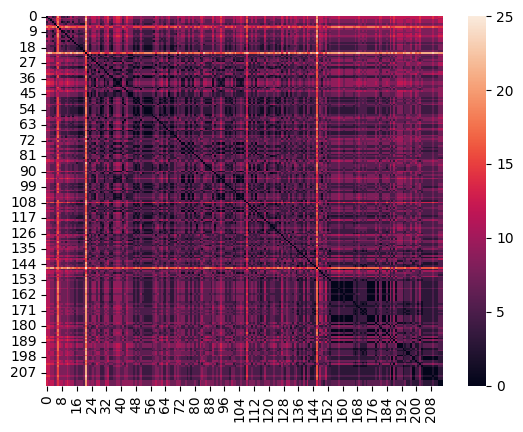

In [129]:
sns.heatmap(matriz_pseudo)

<AxesSubplot:title={'center':'Persistence barcode'}>

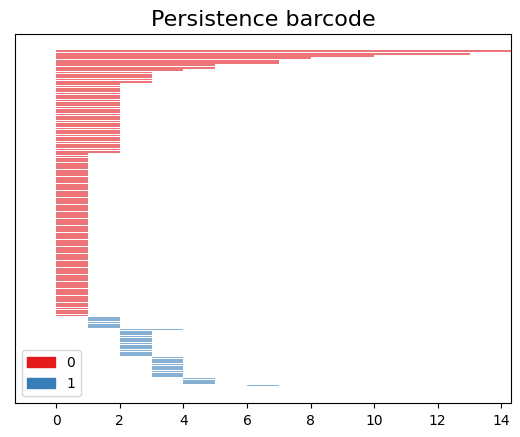

In [130]:
gd.plot_persistence_barcode(complex_pseudo[0],legend=True)

In [ ]:
gd.plot_persistence_diagram(complex_pseudo[0],legend=True)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [132]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import gudhi as gd
from scipy.spatial.distance import hamming
import plotly.graph_objs as go
import networkx as nx
import plotly.graph_objects as go
import plotly.io as pio

In [133]:
def visualize_simplicial_complex(simplex_tree, filtration_value, vertex_names=None, save_filename=None, plot_size=1, dpi=600, pos=None):
    G = nx.Graph()
    triangles = []  # List to store triangles (3-nodes simplices)
    
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
            elif len(simplex) == 1:
                G.add_node(simplex[0])
            elif len(simplex) == 3:
                triangles.append(simplex)
    
    # Calculate node positions if not provided
    if pos is None:
        pos = nx.spring_layout(G)
    
    # Node trace
    x_values, y_values = zip(*[pos[node] for node in G.nodes()])
    node_labels = [vertex_names[node] if vertex_names else str(node) for node in G.nodes()]
    node_trace = go.Scatter(x=x_values, y=y_values, mode='markers+text', hoverinfo='text', marker=dict(size=14), text=node_labels, textposition='top center', textfont=dict(size=14))
    
    # Edge traces
    edge_traces = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace = go.Scatter(x=[x0, x1, None], y=[y0, y1, None], mode='lines', line=dict(width=3, color='rgba(0,0,0,0.5)'))
        edge_traces.append(edge_trace)
    
    # Triangle traces
    triangle_traces = []
    for triangle in triangles:
        x0, y0 = pos[triangle[0]]
        x1, y1 = pos[triangle[1]]
        x2, y2 = pos[triangle[2]]
        triangle_trace = go.Scatter(x=[x0, x1, x2, x0, None], y=[y0, y1, y2, y0, None], fill='toself', mode='lines+markers', line=dict(width=2), fillcolor='rgba(255,0,0,0.2)')
        triangle_traces.append(triangle_trace)
    
    # Configure the layout of the plot
    layout = go.Layout(showlegend=False, hovermode='closest', xaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')), yaxis=dict(showgrid=False, zeroline=False, tickfont=dict(size=16, family='Arial, sans-serif')))
    
    fig = go.Figure(data=edge_traces + triangle_traces + [node_trace], layout=layout)
    
    # Set the figure size
    fig.update_layout(width=plot_size * dpi, height=plot_size * dpi)
    
    # Save the figure if a filename is provided
    if save_filename:
        pio.write_image(fig, save_filename, width=plot_size * dpi, height=plot_size * dpi, scale=1)
    
    # Show the figure
    fig.show()
    
    ciclos=nx.simple_cycles(G)
    
    

    return G

In [134]:
def find_all_cycles(simplex_tree,persistence):
    born=born_filtraton_value_holes(persistence)
    
    G=nx.Graph()
    ciclos_dep=set()
    filtration=0
    for simplex, filt in simplex_tree.get_filtration():
        if filtration!=filt and filtration in born:
            print('se buscan ciclos')
            ciclos=nx.minimum_cycle_basis(G)
            for ciclo in ciclos:
                if len(ciclo)>3:
                    print('Se encontró el ciclo',ciclo,'en el tiempo', filtration)
                    ciclos_dep.add(tuple(ciclo)) 
            
        filtration=filt
        
        if len(simplex)==2:
            G.add_edge(simplex[0], simplex[1])

        

    return ciclos_dep

In [135]:
complex_pseudo 

([(1, (2.0, 4.0)),
  (1, (2.0, 3.0)),
  (1, (3.0, 4.0)),
  (1, (3.0, 4.0)),
  (1, (1.0, 2.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (3.0, 4.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (2.0, 3.0)),
  (1, (1.0, 2.0)),
  (1, (1.0, 2.0)),
  (1, (1.0, 2.0)),
  (1, (1.0, 2.0)),
  (1, (3.0, 4.0)),
  (1, (6.0, 7.0)),
  (1, (4.0, 5.0)),
  (1, (4.0, 5.0)),
  (1, (4.0, 5.0)),
  (1, (3.0, 4.0)),
  (1, (3.0, 4.0)),
  (1, (3.0, 4.0)),
  (1, (3.0, 4.0)),
  (1, (3.0, 4.0)),
  (0, (0.0, inf)),
  (0, (0.0, 13.0)),
  (0, (0.0, 10.0)),
  (0, (0.0, 8.0)),
  (0, (0.0, 7.0)),
  (0, (0.0, 7.0)),
  (0, (0.0, 5.0)),
  (0, (0.0, 5.0)),
  (0, (0.0, 4.0)),
  (0, (0.0, 3.0)),
  (0, (0.0, 3.0)),
  (0, (0.0, 3.0)),
  (0, (0.0, 3.0)),
  (0, (0.0, 3.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0, 2.0)),
  (0, (0.0

In [153]:
ciclos_pseudo=find_all_cycles(complex_pseudo[1],complex_pseudo[0])

se buscan ciclos
Se encontró el ciclo [97, 116, 137, 29] en el tiempo 1.0
Se encontró el ciclo [116, 138, 29, 78] en el tiempo 1.0
Se encontró el ciclo [116, 76, 29, 143] en el tiempo 1.0
Se encontró el ciclo [116, 109, 152, 29] en el tiempo 1.0
Se encontró el ciclo [133, 88, 41, 125] en el tiempo 1.0
se buscan ciclos
Se encontró el ciclo [178, 167, 201, 190] en el tiempo 2.0
Se encontró el ciclo [33, 38, 73, 26, 92, 25] en el tiempo 2.0
Se encontró el ciclo [128, 132, 138, 107] en el tiempo 2.0
Se encontró el ciclo [194, 133, 190, 142] en el tiempo 2.0
Se encontró el ciclo [149, 135, 73, 92] en el tiempo 2.0
Se encontró el ciclo [116, 154, 189, 143] en el tiempo 2.0
Se encontró el ciclo [82, 116, 150, 152] en el tiempo 2.0
Se encontró el ciclo [161, 147, 133, 88, 78] en el tiempo 2.0
Se encontró el ciclo [161, 116, 154, 78] en el tiempo 2.0
Se encontró el ciclo [166, 184, 88, 78] en el tiempo 2.0
Se encontró el ciclo [193, 166, 138, 78] en el tiempo 2.0
Se encontró el ciclo [18, 82, 2

In [157]:
len(ciclos_pseudo)

31

In [158]:
complex_pseudo[0]

[(1, (2.0, 4.0)),
 (1, (2.0, 3.0)),
 (1, (3.0, 4.0)),
 (1, (3.0, 4.0)),
 (1, (1.0, 2.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (3.0, 4.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (2.0, 3.0)),
 (1, (1.0, 2.0)),
 (1, (1.0, 2.0)),
 (1, (1.0, 2.0)),
 (1, (1.0, 2.0)),
 (1, (3.0, 4.0)),
 (1, (6.0, 7.0)),
 (1, (4.0, 5.0)),
 (1, (4.0, 5.0)),
 (1, (4.0, 5.0)),
 (1, (3.0, 4.0)),
 (1, (3.0, 4.0)),
 (1, (3.0, 4.0)),
 (1, (3.0, 4.0)),
 (1, (3.0, 4.0)),
 (0, (0.0, inf)),
 (0, (0.0, 13.0)),
 (0, (0.0, 10.0)),
 (0, (0.0, 8.0)),
 (0, (0.0, 7.0)),
 (0, (0.0, 7.0)),
 (0, (0.0, 5.0)),
 (0, (0.0, 5.0)),
 (0, (0.0, 4.0)),
 (0, (0.0, 3.0)),
 (0, (0.0, 3.0)),
 (0, (0.0, 3.0)),
 (0, (0.0, 3.0)),
 (0, (0.0, 3.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.0, 2.0)),
 (0, (0.

In [161]:
contador=0
for i in complex_pseudo[0]:
    if i[0]==1:
        contador+=1
contador

30

In [188]:
G = nx.Graph()
nx.add_cycle(G,[195, 212, 167, 187])
nx.add_cycle(G,[212, 116, 150, 187])
nx.add_cycle(G,[212, 200, 201, 190])

#nx.add_cycle(G,[33, 84, 90, 26])
#nx.add_cycle(G,[24, 88, 28, 78])
#nx.add_cycle(G,[184, 88, 28, 141])
#nx.add_cycle(G,[136, 24, 92, 78])

#nx.add_cycle(G,[17, 8, 58, 30])
#nx.add_cycle(G,[17, 20, 69, 29])
#nx.add_cycle(G,[13, 75, 29, 62])

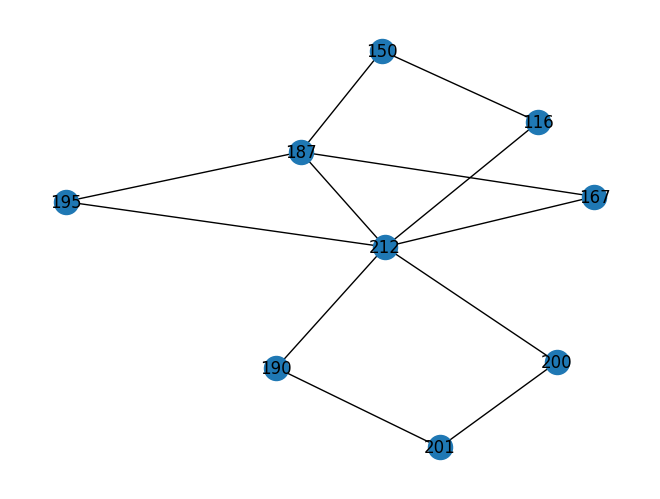

In [203]:
nx.draw(G, with_labels = True)

# complex_pseudo[0]

In [30]:
def find_cycles(simplex_tree, filtration_value):
    G=nx.Graph()
    for simplex, filt in simplex_tree.get_filtration():
        if filt <= filtration_value:
            if len(simplex) == 2:
                G.add_edge(simplex[0], simplex[1])
    

    #ciclos=nx.cycle_basis(G)
    ciclos=nx.minimum_cycle_basis(G)
    ciclos_dep=set()
    for ciclo in ciclos:
        if len(ciclo)>3:
            print('Se encontró el ciclo',ciclo,'en el tiempo', filtration_value)
            ciclos_dep.add(tuple(ciclo))

    return G

In [31]:
def born_filtraton_value_holes(persistence):
    born=set()
    for bar in persistence:
        if bar[0]==1:
            born.add(bar[1][0])
    born=list(born)
    born.sort()
    return born
    

In [ ]:
1+1

<h2>Generar transferencia horizontal </h2>

In [204]:
def mutate(genome, prob, mutated_positions):
    """Performs mutations on a genome with a certain probability."""
    mutations = []
    for i in range(len(genome)):
        if not mutated_positions[i] and np.random.rand() < prob:
            genome[i] = 1 if genome[i] == 0 else 0
            mutations.append(i)
            mutated_positions[i] = True
    return genome, mutations

def create_generation(population, num_offspring, prob, mutated_positions):
    """Creates a new generation from the existing population."""
    new_population = []
    new_generation_history = []
    for idx, genome in enumerate(population):
        for _ in range(num_offspring):
            new_genome, mutations = mutate(genome.copy(), prob, mutated_positions)
            new_population.append(new_genome)
            new_generation_history.append({'parent': idx, 'mutations': mutations})
    return new_population, new_generation_history

def create_population(num_genes, mutation_probability, num_generations, num_offspring, percentage_ones,semilla):
    np.random.seed(semilla)

    initial_genome = np.random.choice([0, 1], size=num_genes, p=[1-percentage_ones, percentage_ones])
    population = [initial_genome]
    genome_history = []
    global_mutated_positions = np.zeros(num_genes, dtype=bool)

    for generation in range(num_generations):
        population, generation_history = create_generation(population, num_offspring, mutation_probability, global_mutated_positions)
        genome_history.extend(generation_history)
        print(f"Generation {generation+1}: {len(population)} genomes")
        # Uncomment the next line if you want to see the details of each generation
        # print(len(population), generation_history)

    return population, genome_history

In [208]:
# Example usage
num_genes = 505
mutation_probability = 1 / num_genes
num_generations = 7
num_offspring = 2
percentage_ones = 0.25

population, population_genome_history = create_population(num_genes, mutation_probability, num_generations, num_offspring, percentage_ones,42)
population = np.array(population)

Generation 1: 2 genomes
Generation 2: 4 genomes
Generation 3: 8 genomes
Generation 4: 16 genomes
Generation 5: 32 genomes
Generation 6: 64 genomes
Generation 7: 128 genomes


In [210]:
def modify_genomes(population, num_groups, group_size, num_positions_to_change):
    np.random.seed(42)  # Puedes usar cualquier número como semilla

    # Crear una copia de la población para evitar modificar el original
    modified_population = population.copy()

    for _ in range(num_groups):
        # Seleccionar genomas de manera aleatoria
        genome_indices = np.random.choice(population.shape[0], group_size, replace=False)
        
        # Elegir un punto de inicio al azar y seleccionar posiciones contiguas para cambiar
        start_position = np.random.choice(population.shape[1] - num_positions_to_change)
        positions_to_change = np.arange(start_position, start_position + num_positions_to_change)
        
        for index in genome_indices:
            # Cambiar los valores en las posiciones seleccionadas a 1
            modified_population[index, positions_to_change] = 1
    
    return modified_population

In [211]:
population_2=modify_genomes(population, num_groups=2, group_size=3, num_positions_to_change=population.shape[1]//32)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

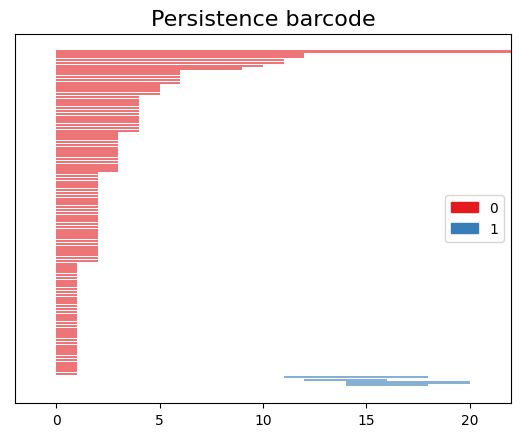

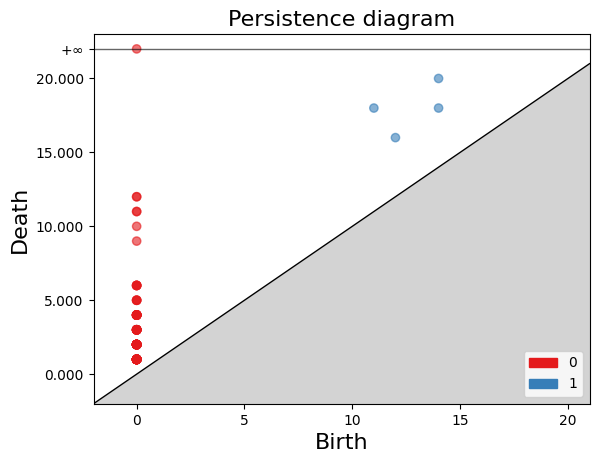

In [213]:
hamming_matrix_2 = calculate_hamming_matrix(population_2)
#hamming_matrix_2

# Print the normalized Hamming distance matrix
#print("Normalized Hamming Distance Matrix:")
#print(normalized_hamming_matrix_2)
persistence2, simplex_tree2 = create_complex(hamming_matrix_2)
gd.plot_persistence_barcode(persistence2)
gd.plot_persistence_diagram(persistence2)

In [ ]:
cycles_2=find_all_cycles(simplex_tree2,persistence2)

se buscan ciclos


In [ ]:
contador=0
for i in persistence2:
    if i[0]==1:
        contador+=1
contador